路透社新闻多分类问题

共有46个分类

有8982个训练样本，2246个测试样本

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
train_labels.shape

(8982,)

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
np.max(train_labels)

45

In [8]:
np.min(train_labels)

0

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# label的one-hot编码
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
y_train[0] # 原始值是3

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 2.7684 - accuracy: 0.5335 - val_loss: 1.8379 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 1.5465 - accuracy: 0.6834 - val_loss: 1.3842 - val_accuracy: 0.6820
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.1811 - accuracy: 0.7419 - val_loss: 1.2089 - val_accuracy: 0.7350
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.9683 - accuracy: 0.7909 - val_loss: 1.0929 - val_accuracy: 0.7550
Epoch 5/9
16/16 [==============================] - 1s 53ms/step - loss: 0.8115 - accuracy: 0.8249 - val_loss: 1.0144 - val_accuracy: 0.7710
Epoch 6/9
16/16 [==============================] - 1s 57ms/step - loss: 0.6750 - accuracy: 0.8581 - val_loss: 0.9679 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5721 - accuracy: 0.8791 - val_loss: 0.9264 - val_accuracy: 0.7960
Epoch 8/9
16/16 [===

In [17]:
def show_history(history):  # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

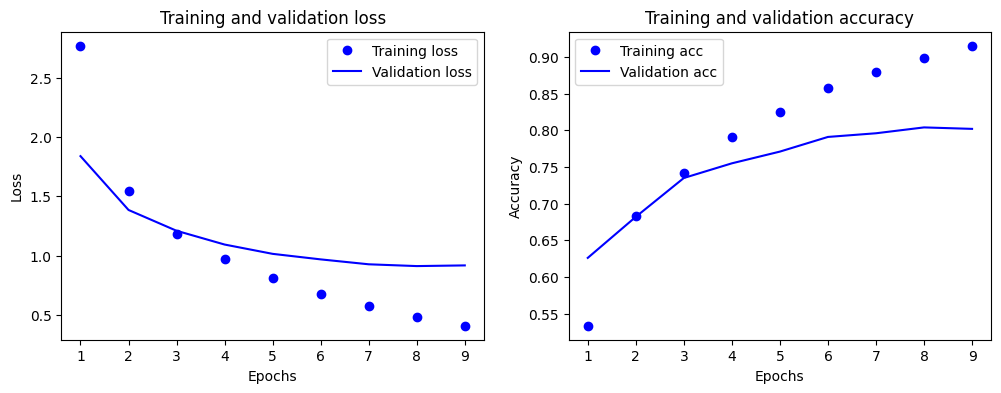

In [18]:
show_history(history)

In [19]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [20]:
predictions[0]

array([1.60861182e-05, 3.53675132e-05, 5.57911189e-05, 9.90576446e-01,
       7.41822179e-03, 1.33105937e-06, 1.99799197e-05, 5.70850898e-05,
       3.86277476e-04, 8.80016887e-06, 2.58923956e-06, 1.50958085e-05,
       2.59331082e-05, 7.49554019e-05, 2.95249429e-05, 1.87292096e-06,
       7.90509803e-05, 4.94816304e-05, 3.81500795e-05, 7.08673979e-05,
       4.08502703e-04, 7.06606879e-05, 3.40087900e-06, 4.26083170e-06,
       3.04280070e-06, 2.96494345e-05, 8.13372424e-07, 2.23895768e-05,
       1.91823146e-05, 1.31936722e-05, 7.56152149e-05, 7.42665861e-06,
       2.96367119e-07, 2.71768727e-06, 1.09053690e-05, 2.64006349e-06,
       1.50423330e-05, 1.44462047e-05, 1.42154440e-05, 2.90957018e-04,
       5.95311258e-06, 1.78052342e-05, 1.77253497e-07, 2.15401519e-06,
       3.29752339e-07, 1.24471796e-06], dtype=float32)

In [21]:
np.sum(predictions[0])

0.99999994

In [22]:
np.argmax(predictions[0])

3